In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df1 = pd.read_csv(r'C:\Users\rgrag\OneDrive\Documents\Portfolio-Career\Population\countrytable.csv')
df2 = pd.read_csv(r'C:\Users\rgrag\OneDrive\Documents\Portfolio-Career\Population\regiondata.csv')

In [15]:
result = pd.concat([df1, df2], ignore_index=True)
result.sort_values(by='Entity', inplace=True)
result.head(5)

,Entity,Year,Population,Lag Population,YoY Growth %,Global Pop Share %,Pop Rank,Percentile Rank,Z Score,Population Quartile,Growth Faster Than Avg,Size Class
0,Afghanistan ...,1950,7776133,NaN,NaN,0.31,45,81.36,-0.0619,1,f,Small
17591,Afghanistan ...,2003,22733007,21378081.0,6.34,0.35,46,80.93,-0.0379,1,t,Medium
17590,Afghanistan ...,2002,21378081,20284252.0,5.39,0.34,48,80.08,-0.0472,1,t,Medium
17589,Afghanistan ...,2001,20284252,20130279.0,0.76,0.32,48,80.08,-0.0544,1,f,Medium
17588,Afghanistan ...,2000,20130279,19887737.0,1.22,0.33,48,80.08,-0.0532,1,f,Medium


In [111]:
df1['Entity'] = df1['Entity'].str.strip()
filtered_entity = df1[df1['Entity'].isin(['Bangladesh', 'Brazil', 'China', 'Germany', 
                                         'India', 'Indonesia', 'Japan', 'Mexico', 'Nigeria', 
                                         'Pakistan', 'Russia', 'United Kingdom', 'United States'])]
filtered_entity[filtered_entity['Year'] == 2023].sort_values(by='Population', ascending=False).drop_duplicates().head(10)

,Entity,Year,Population,Lag Population,YoY Growth %,Global Pop Share %,Pop Rank,Percentile Rank,Z Score,Population Quartile,Growth Faster Than Avg,Size Class
7177,India,2023,1438069540,1.425423e+09,0.89,17.77,1,100.00,10.2717,1,f,Mega
3181,China,2023,1422584878,1.425180e+09,-0.18,17.58,2,99.58,10.1584,1,f,Mega
34187,United States,2023,343477286,3.415340e+08,0.57,4.24,3,99.15,2.2632,1,f,Large
7251,Indonesia,2023,281190021,2.788305e+08,0.85,3.48,4,98.73,1.8075,1,f,Large
29451,Pakistan,2023,247504458,2.437006e+08,1.56,3.06,5,98.31,1.5610,1,t,Large
28933,Nigeria,2023,227882899,2.231509e+08,2.12,2.82,6,97.88,1.4175,1,t,Large
19683,Brazil,2023,211140678,2.103064e+08,0.40,2.61,7,97.46,1.2950,1,f,Large
1257,Bangladesh,2023,171466945,1.693848e+08,1.23,2.12,8,97.03,1.0047,1,t,Large
12949,Russia,2023,145440454,1.455798e+08,-0.10,1.80,9,96.61,0.8143,1,f,Large
10063,Mexico,2023,129739713,1.286131e+08,0.88,1.60,10,96.19,0.6994,1,f,Large


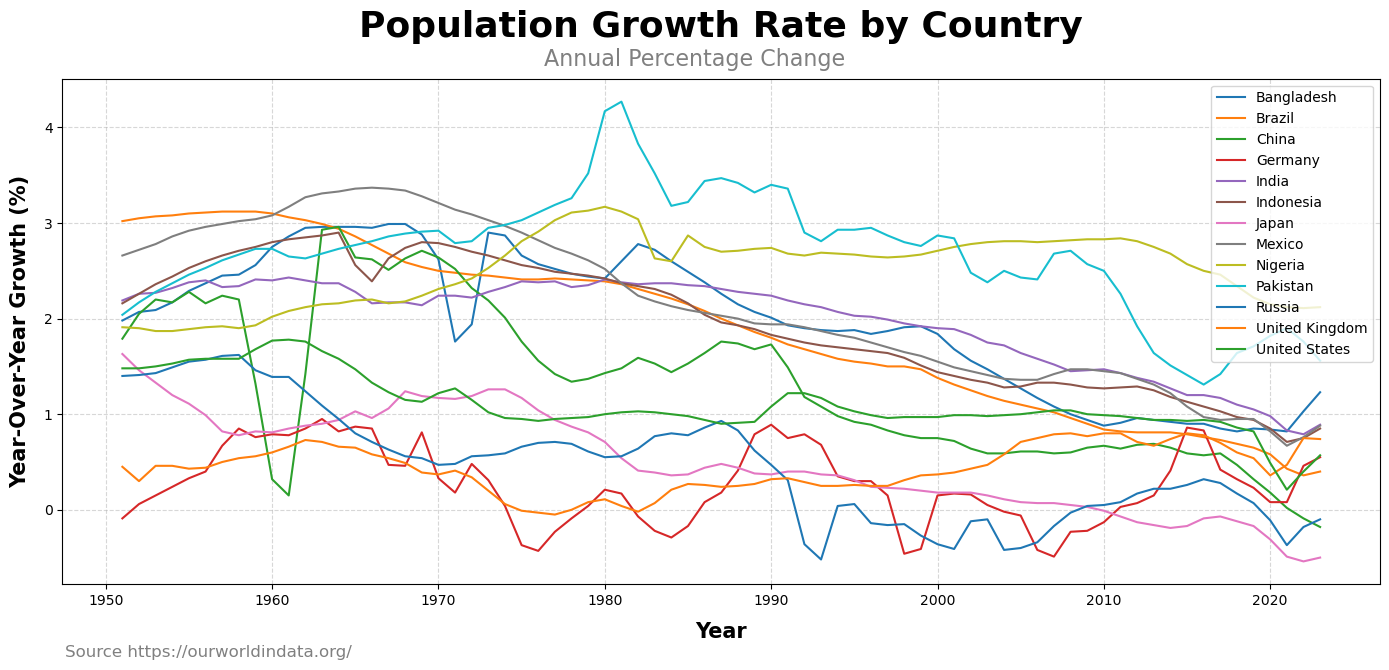

In [181]:
filtered_entity = filtered_entity.drop_duplicates()
pivot = filtered_entity.pivot(index='Year', columns='Entity', values='YoY Growth %')
plt.figure(figsize=(14,7))
for entity in pivot:
    plt.plot(pivot.index, pivot[entity], label=entity)
plt.title('Population Growth Rate by Country', fontsize=26, fontweight='bold', pad=30)
plt.suptitle('Annual Percentage Change', fontsize=16, color='gray', y=0.87)
plt.figtext(0.05, 0, 'Source https://ourworldindata.org/', fontsize=12, color='gray', ha='left')
plt.xlabel('Year', fontsize=15, fontweight='bold', labelpad=10)
plt.ylabel('Year-Over-Year Growth (%)', fontsize=15, fontweight='bold', labelpad=10)
plt.legend(loc='best', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()